In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import copy
import tensorflow as tf
from sklearn.linear_model import LinearRegression

2025-10-05 13:14:11.761542: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-05 13:14:11.823604: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-05 13:14:13.224957: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
df = pd.read_csv("/home/rads-a-dev/Desktop/projects/ml_projects/seoul_bikes_project/data_folder/usable_bike_data.csv")
df

,bike_count,humidity,radiation,rain,snow,temperature,dew_point_temp
0,449,23,1.11,0.0,0.0,1.7,-17.2
1,479,41,1.09,0.0,0.0,4.3,-7.8
2,333,85,0.43,0.0,0.0,5.8,3.4
3,393,38,1.11,0.0,0.0,-0.3,-12.9
4,321,25,0.00,0.0,0.0,-2.3,-19.7
...,...,...,...,...,...,...,...
360,752,57,1.69,0.0,0.0,9.1,1.0
361,672,61,0.85,0.0,0.0,9.3,2.1
362,635,14,1.81,0.0,0.0,7.9,-18.0
363,661,27,0.34,0.0,0.0,5.6,-11.9


##Train, Validate and Test 

In [9]:
# Split the dataset to train, validate and test
train, test_validate = train_test_split(df,test_size = 0.4, shuffle=True, random_state=42)
test, valid = train_test_split(test_validate,test_size = 0.5, shuffle=True, random_state=42)

In [8]:
test

,bike_count,humidity,radiation,rain,snow,temperature,dew_point_temp
262,808,45,1.96,0.0,0.0,31.7,18.3
183,1253,30,3.29,0.0,0.0,28.3,9.0
172,1798,51,1.80,0.0,0.0,22.9,12.2
132,969,20,3.07,0.0,0.0,17.5,-5.7
45,311,64,0.79,0.0,0.0,6.2,-0.1
...,...,...,...,...,...,...,...
192,1204,52,0.82,0.0,0.0,23.2,12.7
229,780,51,2.96,0.0,0.0,31.2,19.8
137,1112,26,3.03,0.0,0.0,18.0,-1.8
155,1258,35,2.74,0.0,0.0,21.9,5.7


In [16]:
#function to extract X and y values from a dataframe
def extract_xy(dataframe, y_label, x_labels):
    if len(x_labels) > 1:#checking if the feature vectors are more than one can be a list of the column name
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    elif len(x_labels) ==1:
        #converting to a 2D array using reshape after accesing the single column and its values
        X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
        print("No feature vectors present")
    #converting the 1 column 1D to a 2D array using reshape after accesing the single column and its values
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))
    return data, X, y
        
            
        
    

In [25]:
#In this case we are just using tempereature t6o check how it affects bike count since for linear regresiion variable is 1
data, X_train_temp, y_train_temp = extract_xy(train, "bike_count", x_labels=["temperature"])
data, X_valid_temp, y_valid_temp = extract_xy(valid, "bike_count", x_labels=["temperature"])
data, X_test_temp, y_test_temp = extract_xy(test, "bike_count", x_labels=["temperature"])

## Linear Regression Model

In [17]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
#printing out the y axis intercept ie c and the gradient ie coef
print(temp_reg.coef_, temp_reg.intercept_)


[[19.90862587]] [393.77476482]


In [21]:
#we can check the R**2 score 
temp_reg.score(X_test_temp
               , y_test_temp)

0.4019783946002059

### Visualizing The Linear Regression Modelling of Best Fit

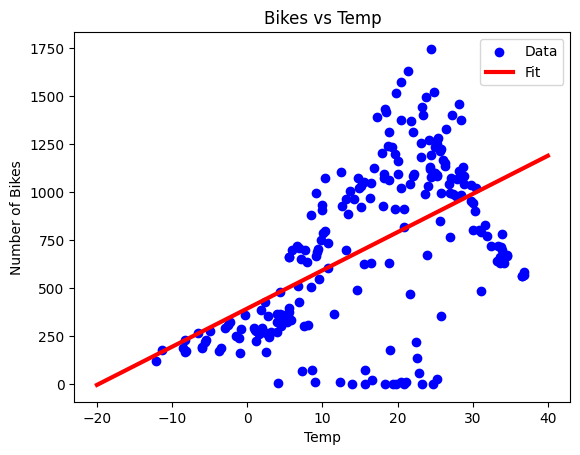

In [36]:
plt.scatter(X_train_temp, y_train_temp, label ="Data",color = "blue")
#Generates evenly-spaced values in an interval along a given axis so generate 100 values evenly spacede between the range
x = tf.linspace(-20,40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red", linewidth=3)
#temp_reg.predict(np.array(x).reshape(-1,1) is essentially y
plt.title("Bikes vs Temp")
plt.legend()
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

## Multiple Linear Regression

In [27]:
df.head()

,bike_count,humidity,radiation,rain,snow,temperature,dew_point_temp
0,449,23,1.11,0.0,0.0,1.7,-17.2
1,479,41,1.09,0.0,0.0,4.3,-7.8
2,333,85,0.43,0.0,0.0,5.8,3.4
3,393,38,1.11,0.0,0.0,-0.3,-12.9
4,321,25,0.00,0.0,0.0,-2.3,-19.7


In [31]:
data, X_train_all, y_train_all = extract_xy(train, "bike_count", x_labels=df.columns[1:])
data, X_valid_all, y_valid_all = extract_xy(valid, "bike_count", x_labels=df.columns[1:])
data, X_test_all, y_test_all = extract_xy(test, "bike_count", x_labels=df.columns[1:])

In [32]:
all_regression = LinearRegression()
all_regression.fit(X_train_all,y_train_all)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
all_regression.score(X_test_all, y_test_all)

0.5694408069428493